# Part 1: Time Series Data Summarization

In [1]:
from scipy.fftpack import dct, idct
import numpy as np
import matplotlib.pyplot as plt

### Interface to facilitate calculation of Euclidean distance, RMSE and statistics

In [2]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
    return sqrt(mean_squared_error(x, y))

def summarize_data(x):
    print("Average:", np.mean(x).round(4), " Mean:", np.median(x).round(4), " Max:", np.max(x).round(4), " Min:", np.min(x).round(4), "\n")

### Load 50k time_series (synthetic and seismic)

In [3]:
import struct
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

# Compression with float32

In [4]:
def compress_to_size(x, size):
    size = int(size/4)
    com_x = dct(x, n = size, norm = 'ortho')
    return com_x
def decompress1024(x, size):
    rec_x = idct(x, n = 256, norm = 'ortho')
    return rec_x

## 50k synthetic time_series (float32)

In [5]:
# Following code is to compress and reconstruct synthetic data

x = time_series_synthetic

sum_128 = compress_to_size(x, 128)
sum_64 = compress_to_size(x, 64)
sum_32 = compress_to_size(x, 32)

rec_128 = decompress1024(sum_128, 128)
rec_64 = decompress1024(sum_64, 64)
rec_32 = decompress1024(sum_32, 32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic_float32 = []
errorList_64_synthetic_float32 = []
errorList_32_synthetic_float32 = []

data_size = 50000
for i in range(data_size):
    x = time_series_synthetic[i,]
    errorList_128_synthetic_float32.append(rmse(x, rec_128[i,]))
    errorList_64_synthetic_float32.append(rmse(x, rec_64[i,]))
    errorList_32_synthetic_float32.append(rmse(x, rec_32[i,]))

## 50k seismic time_series (float32)

In [6]:
# Following code is to compress and reconstruct seismic data

x = time_series_seismic

sum_128 = compress_to_size(x, 128)
sum_64 = compress_to_size(x, 64)
sum_32 = compress_to_size(x, 32)

rec_128 = decompress1024(sum_128, 128)
rec_64 = decompress1024(sum_64, 64)
rec_32 = decompress1024(sum_32, 32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic_float32 = []
errorList_64_seismic_float32 = []
errorList_32_seismic_float32 = []

data_size = 50000
for i in range(data_size):
    x = time_series_seismic[i,]
    errorList_128_seismic_float32.append(rmse(x, rec_128[i,]))
    errorList_64_seismic_float32.append(rmse(x, rec_64[i,]))
    errorList_32_seismic_float32.append(rmse(x, rec_32[i,]))

# Compression with int8

In [7]:
def compress_to_size(x, size):
    size = int(size)
    com_x = dct(x, n = size, norm = 'ortho')
    return com_x
def decompress1024(x, size):
    rec_x = idct(x, n = 256, norm = 'ortho')
    return rec_x

## 50k synthetic time_series (int8)

In [8]:
# Following code is to compress and reconstruct synthetic data

x = time_series_synthetic

sum_128 = compress_to_size(x, 128)
sum_64 = compress_to_size(x, 64)
sum_32 = compress_to_size(x, 32)

scale_n_128 = 127 / max(abs(np.amax(sum_128)), abs(np.amin(sum_128)))
sum_128 = np.multiply(sum_128, scale_n_128).round().astype(np.int8)
sum_128 = np.multiply(sum_128, 1/scale_n_128).astype(np.float32)

scale_n_64 = 127 / max(abs(np.amax(sum_64)), abs(np.amin(sum_64)))
sum_64 = np.multiply(sum_64, scale_n_64).round().astype(np.int8)
sum_64 = np.multiply(sum_64, 1/scale_n_64).astype(np.float32)

scale_n_32 = 127 / max(abs(np.amax(sum_32)), abs(np.amin(sum_32)))
sum_32 = np.multiply(sum_32, scale_n_32).round().astype(np.int8)
sum_32 = np.multiply(sum_32, 1/scale_n_32).astype(np.float32)

rec_128 = decompress1024(sum_128, 128)
rec_64 = decompress1024(sum_64, 64)
rec_32 = decompress1024(sum_32, 32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic_int8 = []
errorList_64_synthetic_int8 = []
errorList_32_synthetic_int8 = []

data_size = 50000
for i in range(data_size):
    x = time_series_synthetic[i,]
    errorList_128_synthetic_int8.append(rmse(x, rec_128[i,]))
    errorList_64_synthetic_int8.append(rmse(x, rec_64[i,]))
    errorList_32_synthetic_int8.append(rmse(x, rec_32[i,]))

## 50k seismic time_series (int8)

In [9]:
# Following code is to compress and reconstruct seismic data

x = time_series_seismic

sum_128 = compress_to_size(x, 128)
sum_64 = compress_to_size(x, 64)
sum_32 = compress_to_size(x, 32)

scale_n_128 = 127 / max(abs(np.amax(sum_128)), abs(np.amin(sum_128)))
sum_128 = np.multiply(sum_128, scale_n_128).round().astype(np.int8)
sum_128 = np.multiply(sum_128, 1/scale_n_128).astype(np.float32)

scale_n_64 = 127 / max(abs(np.amax(sum_64)), abs(np.amin(sum_64)))
sum_64 = np.multiply(sum_64, scale_n_64).round().astype(np.int8)
sum_64 = np.multiply(sum_64, 1/scale_n_64).astype(np.float32)

scale_n_32 = 127 / max(abs(np.amax(sum_32)), abs(np.amin(sum_32)))
sum_32 = np.multiply(sum_32, scale_n_32).round().astype(np.int8)
sum_32 = np.multiply(sum_32, 1/scale_n_32).astype(np.float32)

rec_128 = decompress1024(sum_128, 128)
rec_64 = decompress1024(sum_64, 64)
rec_32 = decompress1024(sum_32, 32)

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic_int8 = []
errorList_64_seismic_int8 = []
errorList_32_seismic_int8 = []

data_size = 50000
for i in range(data_size):
    x = time_series_seismic[i,]
    errorList_128_seismic_int8.append(rmse(x, rec_128[i,]))
    errorList_64_seismic_int8.append(rmse(x, rec_64[i,]))
    errorList_32_seismic_int8.append(rmse(x, rec_32[i,]))

## Error evaluation

In [10]:
# Reconstruction error for 50k synthetic time_series
print("RMSE of 50k synthetic time series: 128 -> 1024 (float32)")
summarize_data(errorList_128_synthetic_float32)
print("RMSE of 50k synthetic time series: 64 -> 1024 (float32)")
summarize_data(errorList_64_synthetic_float32)
print("RMSE of 50k synthetic time series: 32 -> 1024 (float32)")
summarize_data(errorList_32_synthetic_float32)

print("RMSE of 50k synthetic time series: 128 -> 1024 (int8)")
summarize_data(errorList_128_synthetic_int8)
print("RMSE of 50k synthetic time series: 64 -> 1024 (int8)")
summarize_data(errorList_64_synthetic_int8)
print("RMSE of 50k synthetic time series: 32 -> 1024 (int8)")
summarize_data(errorList_32_synthetic_int8)


# Reconstruction error for 50k seismic time_series
print("RMSE of 50k seismic time series: 128 -> 1024 (float32)")
summarize_data(errorList_128_seismic_float32)
print("RMSE of 50k seismic time series: 64 -> 1024 (float32)")
summarize_data(errorList_64_seismic_float32)
print("RMSE of 50k seismic time series: 32 -> 1024 (float32)")
summarize_data(errorList_32_seismic_float32)

print("RMSE of 50k seismic time series: 128 -> 1024 (int8)")
summarize_data(errorList_128_seismic_int8)
print("RMSE of 50k seismic time series: 64 -> 1024 (int8)")
summarize_data(errorList_64_seismic_int8)
print("RMSE of 50k seismic time series: 32 -> 1024 (int8)")
summarize_data(errorList_32_seismic_int8)

RMSE of 50k synthetic time series: 128 -> 1024 (float32)
Average: 1.0835  Mean: 1.0813  Max: 1.4684  Min: 0.7904 

RMSE of 50k synthetic time series: 64 -> 1024 (float32)
Average: 1.0499  Mean: 1.0457  Max: 1.3067  Min: 0.8684 

RMSE of 50k synthetic time series: 32 -> 1024 (float32)
Average: 1.0274  Mean: 1.0237  Max: 1.2169  Min: 0.9162 

RMSE of 50k synthetic time series: 128 -> 1024 (int8)
Average: 1.1059  Mean: 1.1016  Max: 1.6771  Min: 0.5767 

RMSE of 50k synthetic time series: 64 -> 1024 (int8)
Average: 1.1229  Mean: 1.1209  Max: 1.5742  Min: 0.7532 

RMSE of 50k synthetic time series: 32 -> 1024 (int8)
Average: 1.0836  Mean: 1.0813  Max: 1.4648  Min: 0.7916 

RMSE of 50k seismic time series: 128 -> 1024 (float32)
Average: 1.0601  Mean: 1.058  Max: 1.4974  Min: 0.9459 

RMSE of 50k seismic time series: 64 -> 1024 (float32)
Average: 1.0304  Mean: 1.028  Max: 1.485  Min: 0.9975 

RMSE of 50k seismic time series: 32 -> 1024 (float32)
Average: 1.0153  Mean: 1.013  Max: 1.4685  Min:

## Visualize reconstruction errors of 50k time series with Boxplot

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

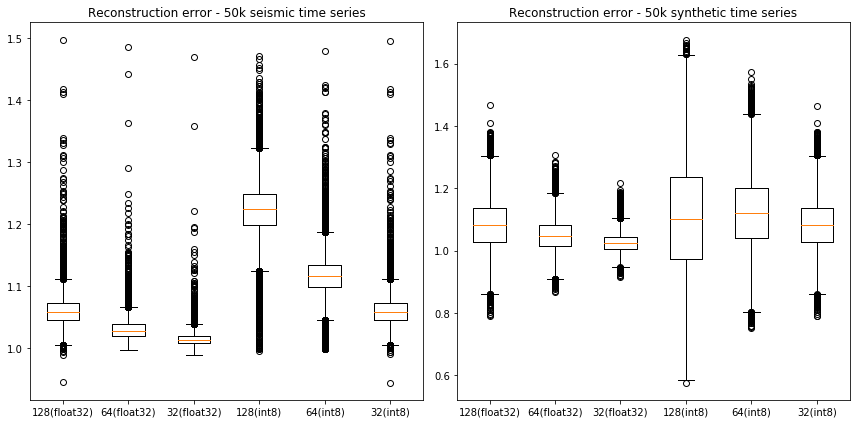

In [12]:
plt.subplot(1,2,1)
plt.boxplot([errorList_128_seismic_float32, errorList_64_seismic_float32, errorList_32_seismic_float32, 
             errorList_128_seismic_int8, errorList_64_seismic_int8, errorList_32_seismic_int8])
plt.title('Reconstruction error - 50k seismic time series')
plt.xticks([1, 2, 3, 4, 5, 6], ['128(float32)', '64(float32)', '32(float32)', '128(int8)', '64(int8)', '32(int8)'])

plt.subplot(1,2,2)
plt.boxplot([errorList_128_synthetic_float32, errorList_64_synthetic_float32, errorList_32_synthetic_float32, 
             errorList_128_synthetic_int8, errorList_64_synthetic_int8, errorList_32_synthetic_int8])
plt.title('Reconstruction error - 50k synthetic time series')
plt.xticks([1, 2, 3, 4, 5, 6], ['128(float32)', '64(float32)', '32(float32)', '128(int8)', '64(int8)', '32(int8)'])

plt.tight_layout()
plt.show

In [13]:
import numpy as np
errorFolder = "./errors/"
errorTag = "_DCT"

np.save(errorFolder + "128_seismic" + errorTag + "_float32", errorList_128_seismic_float32)
np.save(errorFolder + "64_seismic" + errorTag + "_float32", errorList_64_seismic_float32)
np.save(errorFolder + "32_seismic" + errorTag + "_float32", errorList_32_seismic_float32)
np.save(errorFolder + "128_seismic" + errorTag + "_int8", errorList_128_seismic_int8)
np.save(errorFolder + "64_seismic" + errorTag + "_int8", errorList_64_seismic_int8)
np.save(errorFolder + "32_seismic" + errorTag + "_int8", errorList_32_seismic_int8)

np.save(errorFolder + "128_synthetic" + errorTag + "_float32", errorList_128_synthetic_float32)
np.save(errorFolder + "64_synthetic" + errorTag + "_float32", errorList_64_synthetic_float32)
np.save(errorFolder + "32_synthetic" + errorTag + "_float32", errorList_32_synthetic_float32)
np.save(errorFolder + "128_synthetic" + errorTag + "_int8", errorList_128_synthetic_int8)
np.save(errorFolder + "64_synthetic" + errorTag + "_int8", errorList_64_synthetic_int8)
np.save(errorFolder + "32_synthetic" + errorTag + "_int8", errorList_32_synthetic_int8)

In [14]:
# load example
# data = np.load(errorFolder + "128_seismic" + errorTag + "_float32" + ".npy")